# Introduction and numerical representation. 

Much of the following is based on this: 

https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter09.01-BaseN-and-Binary.html

Lets' load some libraries:

In [2]:
import numpy as np 
import scipy as sp  
import matplotlib.pyplot as plt
import sys

## Machine accuracy

In [3]:

sys.float_info


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

`sys.float_info` provides detailed information about the properties of floating point numbers (type `float`) on your system, according to the IEEE 754 double-precision standard (which is what Python uses for `float`). Here’s what the main fields mean:

- **max**: Largest representable positive float (`1.7976931348623157e+308`)
- **min**: Smallest positive normalized float (`2.2250738585072014e-308`)
- **epsilon**: The difference between 1 and the next representable float (`2.220446049250313e-16`). This is the machine precision.
- **dig**: Number of decimal digits of precision (15)
- **mant_dig**: Number of bits in the mantissa (53)
- **max_exp**: Maximum exponent for base 2 (1024)
- **min_exp**: Minimum exponent for base 2 (-1021)
- **max_10_exp**: Maximum exponent for base 10 (308)
- **min_10_exp**: Minimum exponent for base 10 (-307)
- **radix**: Base of the exponent (2, since binary)
- **rounds**: Rounding mode (1 means round to nearest)

In summary, this tells you the range, precision, and behavior of floating point numbers in Python on your system.

The **mantissa** (also called the significand) and the **exponent base** are key components of floating-point numbers, which are used to represent real numbers in computers.

- **Mantissa (Significand):**  
    This is the part of a floating-point number that contains its significant digits. For example, in scientific notation, the number 6.022 × 10²³ has a mantissa of 6.022.

- **Exponent Base:**  
    This is the base used for the exponent part of the number. In most computer systems (following the IEEE 754 standard), the base is 2 (binary). So, a floating-point number is represented as:  
    **number = mantissa × (base)^(exponent)**  
    For example, 1.5 × 2³ = 12.

In summary, the mantissa determines the precision of the number, while the exponent (with its base) determines the scale or magnitude. In Python, the base is always 2 for floating-point numbers.

In [4]:
sys.int_info 

sys.int_info(bits_per_digit=30, sizeof_digit=4, default_max_str_digits=4300, str_digits_check_threshold=640)

`sys.int_info` provides information about how Python represents arbitrary-precision integers (`int`) internally. Here’s what the fields mean:

- **bits_per_digit**: Number of bits used for each internal "digit" in Python's representation of large integers (30 bits per digit).
- **sizeof_digit**: Size in bytes of each internal digit (4 bytes).
- **default_max_str_digits**: Maximum number of digits allowed when converting an integer to a string (default is 4300). This is a security feature to prevent denial-of-service attacks from extremely large integers.
- **str_digits_check_threshold**: The threshold above which Python checks the number of digits when converting an integer to a string (640).

In summary, these settings control how efficiently and safely Python can handle very large integers.

### The numpy library

In [5]:
import numpy as np
np.spacing(1e9)

np.float64(1.1920928955078125e-07)

`np.spacing(1e9)` returns the smallest possible difference between two distinct floating point numbers around the value `1e9` (one billion), using NumPy's float64 precision.

The result, `1.1920928955078125e-07`, is the distance between `1e9` and the next larger representable float. This value is also known as the **machine epsilon** at that scale. It shows the precision limit of floating point arithmetic near `1e9`: any two numbers closer than this cannot be distinguished by a float64 variable.

Try with other values. 

In [6]:
np.spacing(1)

np.float64(2.220446049250313e-16)

In [7]:
# assign some variables
x = 7 # integer assignment of the integer 7
y = 7.0 # floating point assignment of the decimal number 7.0
print("The variable x has the value", x, " and has type", type(x), ". \n")
print("The variable y has the value", y, " and has type", type(y), ". \n")

The variable x has the value 7  and has type <class 'int'> . 

The variable y has the value 7.0  and has type <class 'float'> . 



In [8]:
# multiplying by a float will convert an integer to a float
x = 7 # integer assignment of the integer 7
print("Multiplying x by 1.0 gives", 1.0*x)
print("The type of this value is", type(1.0*x), ". \n")

Multiplying x by 1.0 gives 7.0
The type of this value is <class 'float'> . 



**Exercise** Write code to define positive integers  and  of your own choosing. Then calculate  and . When you have all three values computed, check to see if your three values form a Pythagorean Triple so that . Have Python simply say True or False to verify that you do, or do not, have a Pythagorean Triple defined. Hint: You will need to use the == Boolean check just like in other programming languages.

In [4]:
# Define positive integers a and b
a = 3
b = 4

# Calculate c
c = (a**2 + b**2)**0.5

# Check if (a, b, c) form a Pythagorean Triple
is_pythagorean_triple = a**2 + b**2 == c**2
print(is_pythagorean_triple)

True


In [11]:
import time

# Method 1: Running total using a for loop
Total = 0

start1 = time.time()
for i in range(1, 101):
    Total += i**3
end1 = time.time()
print("Sum using running total:", Total)
print("Time for running total:", end1 - start1, "seconds")

    # Method 2: Build a list of perfect cubes and sum with sum()
cubes = []
start2 = time.time()
for i in range(1, 101):
    cubes.append(i**3)
sum_cubes = sum(cubes)
end2 = time.time()
print("Sum using sum() on list:", sum_cubes)
print("Time for sum() on list:", end2 - start2, "seconds")
print("time difference:", (end2 - start1)-(end1 - start1), "seconds")
print("time difference in percent:", ((end2 - start1)-(end1 - start1)) / (end1 - start1) * 100, "%")


Sum using running total: 25502500
Time for running total: 4.506111145019531e-05 seconds
Sum using sum() on list: 25502500
Time for sum() on list: 5.0067901611328125e-05 seconds
time difference: 0.00012993812561035156 seconds
time difference in percent: 288.35978835978835 %


In [13]:
# Pre-allocate a list of size 20 for the sequence
sequence = [0] * 20

# Build the sequence: a_n = 2^n for n = 1 to 20
for n in range(1, 21):
    sequence[n-1] = 2**n

# Print the list after all computations
print(sequence)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]


In [15]:
x = 1.0/8
for n in range(50):
    if x<= 0.5:
        x=2*x# put the correct assignment here
    else:
        x=2*x-1# put the correct assigment here
    print(x)

0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [19]:
fraction = 4.125
binary_representation = format(int(fraction * 2**10), '010b')
print("Binary (approx, 10 bits): 0." + binary_representation)

Binary (approx, 10 bits): 0.1000010000000


In [23]:
10**10  + 0.123456789 - 10**10 

0.12345695495605469

In [27]:
a = [ ] 
for n in range (1 ,11) : 
    x = 1/n 
    for k in range (10) : 
        x = (n + 1) * x - 1 
    x_10= x
    for k in range (29) :
        x = (n + 1) * x - 1
    x_29= x
    print("n =", n, " 1/n=", 1/n, " x_10 =", x_10, " x_29 =", x_29)

n = 1  1/n= 1.0  x_10 = 1.0  x_29 = 1.0
n = 2  1/n= 0.5  x_10 = 0.5  x_29 = 0.5
n = 3  1/n= 0.3333333333333333  x_10 = 0.3333333333139308  x_29 = -5592405.0
n = 4  1/n= 0.25  x_10 = 0.25  x_29 = 0.25
n = 5  1/n= 0.2  x_10 = 0.20000000179015842  x_29 = 65959556527001.77
n = 6  1/n= 0.16666666666666666  x_10 = 0.16666666069313285  x_29 = -1.9234215915856572e+16
n = 7  1/n= 0.14285714285714285  x_10 = 0.1428571343421936  x_29 = -1.3176245766935393e+18
n = 8  1/n= 0.125  x_10 = 0.125  x_29 = 0.125
n = 9  1/n= 0.1111111111111111  x_10 = 0.11111116045435665  x_29 = 4.934324553889585e+21
n = 10  1/n= 0.1  x_10 = 0.10000020942782539  x_29 = 3.322173065069967e+23


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
%matplotlib inline

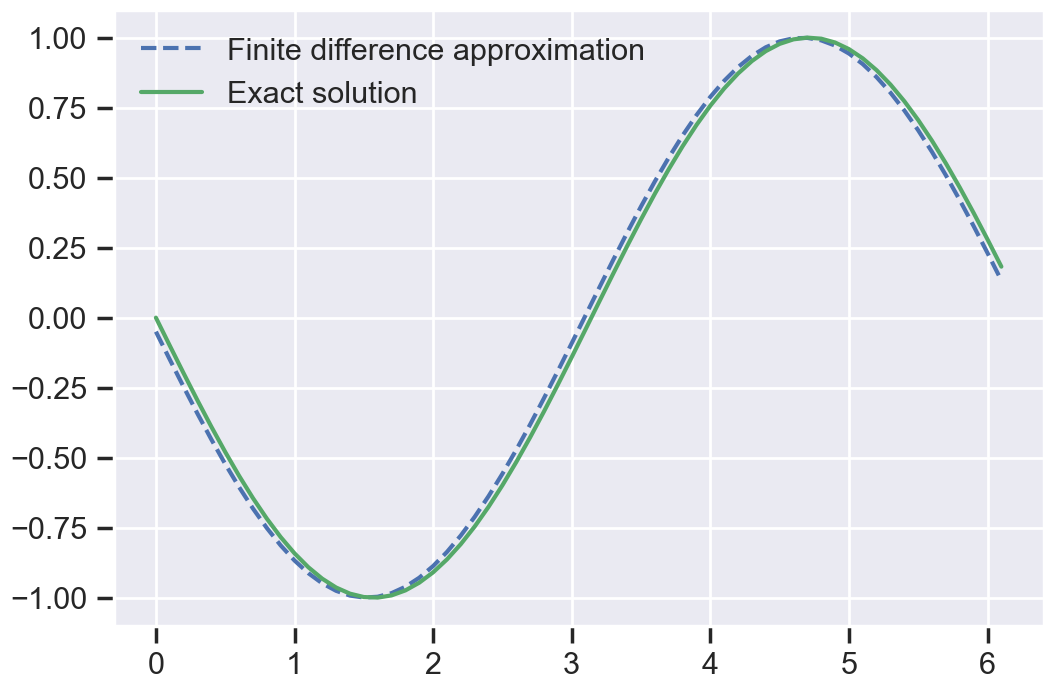

0.049984407218554114


In [34]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

## Computational Complexity of Operations

Computational complexity describes how the time (or number of steps) required to perform an operation grows as the size of the input increases. Here are some common complexities:

- **O(1): Constant time** — The operation takes the same amount of time regardless of input size. Example: accessing an element in a list by index.
- **O(n): Linear time** — The time grows linearly with input size. Example: summing all elements in a list.
- **O(n²): Quadratic time** — The time grows with the square of the input size. Example: nested loops over a list.

Let's demonstrate this with a numerical example by timing three operations: accessing an element, summing a list, and a nested loop.


In [11]:

import time
import numpy as np
import bisect
import time

n = 10**6
lst = list(range(n))

# O(log n): Binary search for an element
target = n - 1
start = time.time()
index = bisect.bisect_left(lst, target)
end = time.time()
print("O(log n) binary search time:", end - start, "seconds")

n = 10**6
lst = list(range(n))

# O(1): Accessing an element
start = time.time()
x = lst[n//2]
end = time.time()
print("O(1) access time:", end - start, "seconds")

# O(n): Summing all elements
start = time.time()
total = sum(lst)
end = time.time()
print("O(n) sum time:", end - start, "seconds")

# O(log n): Binary search for an element
target = n - 1
start = time.time()
index = bisect.bisect_left(lst, target)
end = time.time()
print("O(log n) binary search time:", end - start, "seconds")

# O(n^2): Nested loop (warning: can be slow for large n)
n_small = 1000  # Use a smaller n for quadratic example
lst_small = list(range(n_small))
start = time.time()
count = 0
for i in lst_small:
    for j in lst_small:
        count += i * j
end = time.time()
print("O(n^2) nested loop time:", end - start, "seconds")

O(log n) binary search time: 3.504753112792969e-05 seconds
O(1) access time: 3.2901763916015625e-05 seconds
O(n) sum time: 0.0068721771240234375 seconds
O(log n) binary search time: 2.9325485229492188e-05 seconds
O(n^2) nested loop time: 0.0743868350982666 seconds


## Theory: Why These Examples Have Their Complexity

- **O(1): Constant Time**  
  Accessing an element in a list by its index (e.g., `lst[n//2]`) is a constant-time operation. No matter how large the list is, Python can directly retrieve the value at any index without scanning the list. This is because lists are implemented as arrays in memory.

- **O(n): Linear Time**  
  Summing all elements in a list (e.g., `sum(lst)`) requires visiting each element exactly once. As the list grows, the time taken grows proportionally. If you double the size of the list, the time to sum it roughly doubles.

- **O(n²): Quadratic Time**  
  A nested loop over a list (e.g., `for i in lst: for j in lst: ...`) means that for every element in the outer loop, you iterate over every element in the inner loop. If the list has `n` elements, you perform `n * n = n²` operations. This means the time increases very rapidly as the list size increases.

These examples illustrate how the structure of your code determines how well it will scale to large inputs.